In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("../data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
attribute=np.array(['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean'])
df=df[attribute]
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,842302,M,17.99,10.38,122.80,1001.0
1,842517,M,20.57,17.77,132.90,1326.0
2,84300903,M,19.69,21.25,130.00,1203.0
3,84348301,M,11.42,20.38,77.58,386.1
4,84358402,M,20.29,14.34,135.10,1297.0
...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0
565,926682,M,20.13,28.25,131.20,1261.0
566,926954,M,16.60,28.08,108.30,858.1
567,927241,M,20.60,29.33,140.10,1265.0


In [5]:
import seaborn as sns

In [6]:
df.isna().sum()

id                0
diagnosis         0
radius_mean       0
texture_mean      0
perimeter_mean    0
area_mean         0
dtype: int64

In [7]:
import matplotlib.pyplot as plt

/tmp/ipykernel_76039/2587569568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['radius_mean'])
/tmp/ipykernel_76039/2587569568.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['texture_mean'])
/tmp/ipykernel_76039/2587569568.py:9: UserWarning: 

`distplot` is a deprecated function 

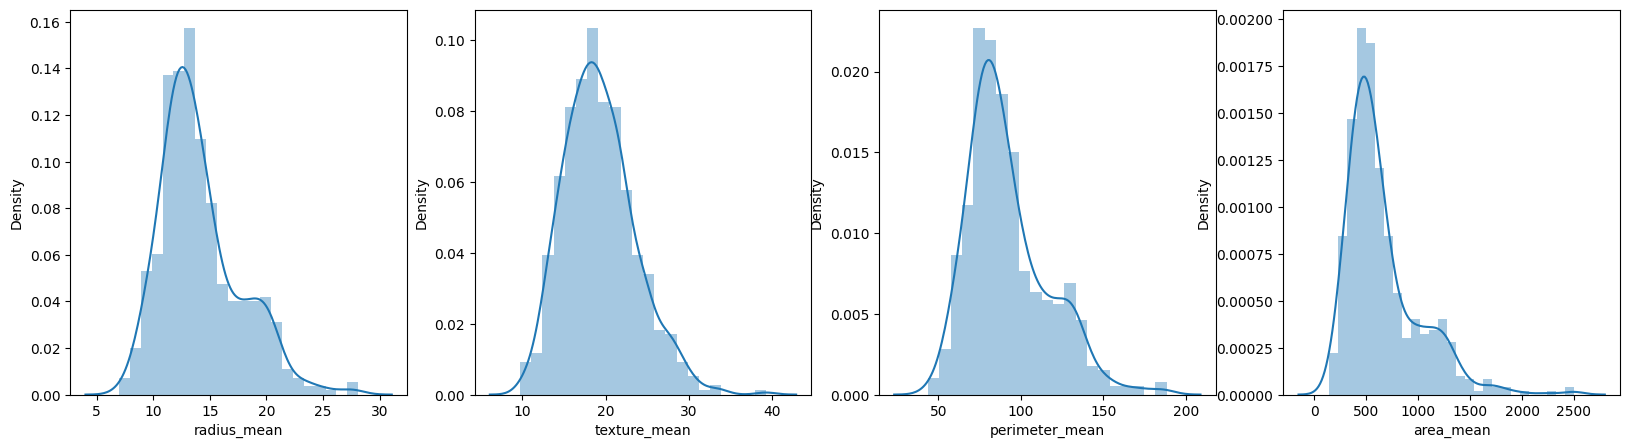

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.distplot(df['radius_mean'])

plt.subplot(1,4,2)
sns.distplot(df['texture_mean'])

plt.subplot(1,4,3)
sns.distplot(df['perimeter_mean'])

plt.subplot(1,4,4)
sns.distplot(df['area_mean'])

plt.show()

In [15]:
df['texture_mean'].describe()

count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64

In [16]:
upper_limit=df['texture_mean'].mean() + 3* df['texture_mean'].std()
upper_limit

32.19275581065199

In [17]:
lower_limit = df['texture_mean'].mean() - 3* df['texture_mean'].std()
lower_limit

6.386541201650294

In [18]:
df[(df['texture_mean'] < lower_limit) | (df['texture_mean'] > upper_limit)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
219,88119002,M,19.53,32.47,128.00,1223.0
232,88203002,B,11.22,33.81,70.79,386.8
239,88330202,M,17.46,39.28,113.40,920.6
259,88725602,M,15.53,33.56,103.70,744.9


**Triming**

In [20]:
new_df = df[(df['texture_mean']>=lower_limit) & (df['texture_mean']<=upper_limit)]
new_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,842302,M,17.99,10.38,122.80,1001.0
1,842517,M,20.57,17.77,132.90,1326.0
2,84300903,M,19.69,21.25,130.00,1203.0
3,84348301,M,11.42,20.38,77.58,386.1
4,84358402,M,20.29,14.34,135.10,1297.0
...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0
565,926682,M,20.13,28.25,131.20,1261.0
566,926954,M,16.60,28.08,108.30,858.1
567,927241,M,20.60,29.33,140.10,1265.0
